In [14]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.0 MB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 958.6 kB/s eta 0:00:001m804.1 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [17]:
# import re
# import sys
# import pickle
# import math
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [18]:
content = []
input_data = 'news.csv'
with open(input_data, 'r', encoding='latin1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        content.append(row)

In [19]:
data = pd.DataFrame(content)

In [20]:
data.head(5)

,Judul,Waktu,URL,Kelas,Konten
0,BawaBawa Marc Marquez Raul Fernandez Soroti Pe...,Senin 24 Juni 2024 18:10 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,MADRID â Pembalap Trackhouse Racing Raul Fer...
1,Sebelum Putuskan Bela KTM Maverick Vinales Nya...,Senin 24 Juni 2024 17:57 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,PEMBALAP Tim Aprilia Racing Maverick Vinales t...
2,Tak Mau Putranya Ikut Jadi Petinju Anthony Jos...,Senin 24 Juni 2024 19:30 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,TAHU betapa kerasnya dunia tinju petinju asal ...
3,PUBG MOBILE Luncurkan Update Mecha Fusion Maki...,Senin 24 Juni 2024 17:58 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,SALAH satu game battle royale terpopuler di du...
4,Kaget Lihat Banyaknya Perizinan untuk Gelar Mo...,Selasa 25 Juni 2024 00:01 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,JAKARTA Presiden Republik Indonesia RI Joko Wi...


In [21]:
data = data.dropna()

In [22]:
data.head(5)

,Judul,Waktu,URL,Kelas,Konten
0,BawaBawa Marc Marquez Raul Fernandez Soroti Pe...,Senin 24 Juni 2024 18:10 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,MADRID â Pembalap Trackhouse Racing Raul Fer...
1,Sebelum Putuskan Bela KTM Maverick Vinales Nya...,Senin 24 Juni 2024 17:57 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,PEMBALAP Tim Aprilia Racing Maverick Vinales t...
2,Tak Mau Putranya Ikut Jadi Petinju Anthony Jos...,Senin 24 Juni 2024 19:30 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,TAHU betapa kerasnya dunia tinju petinju asal ...
3,PUBG MOBILE Luncurkan Update Mecha Fusion Maki...,Senin 24 Juni 2024 17:58 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,SALAH satu game battle royale terpopuler di du...
4,Kaget Lihat Banyaknya Perizinan untuk Gelar Mo...,Selasa 25 Juni 2024 00:01 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,JAKARTA Presiden Republik Indonesia RI Joko Wi...


In [23]:
data['Konten'] = data['Konten'].str.lower()

In [24]:
data.head(5)

,Judul,Waktu,URL,Kelas,Konten
0,BawaBawa Marc Marquez Raul Fernandez Soroti Pe...,Senin 24 Juni 2024 18:10 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,madrid â pembalap trackhouse racing raul fer...
1,Sebelum Putuskan Bela KTM Maverick Vinales Nya...,Senin 24 Juni 2024 17:57 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,pembalap tim aprilia racing maverick vinales t...
2,Tak Mau Putranya Ikut Jadi Petinju Anthony Jos...,Senin 24 Juni 2024 19:30 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,tahu betapa kerasnya dunia tinju petinju asal ...
3,PUBG MOBILE Luncurkan Update Mecha Fusion Maki...,Senin 24 Juni 2024 17:58 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,salah satu game battle royale terpopuler di du...
4,Kaget Lihat Banyaknya Perizinan untuk Gelar Mo...,Selasa 25 Juni 2024 00:01 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,jakarta presiden republik indonesia ri joko wi...


In [25]:
data['Konten'] = data['Konten'].str.replace('[^\w\s]', '')

In [26]:
data['Kelas'].value_counts()

Kelas
olahraga      510
pendidikan    319
kesehatan     289
pariwisata    262
Name: count, dtype: int64

<Axes: xlabel='Kelas'>

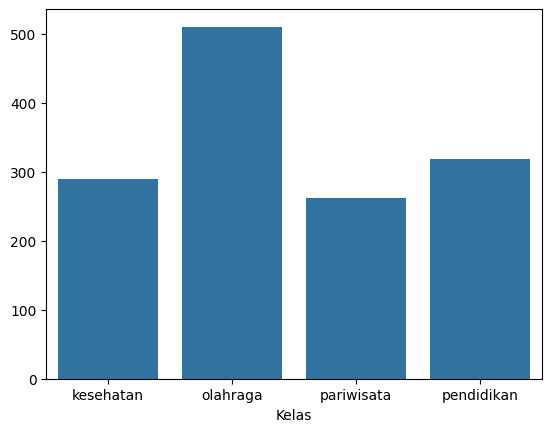

In [27]:
result = data.groupby(['Kelas']).size()
sns.barplot(x = result.index, y = result.values)

<Axes: xlabel='Situs'>

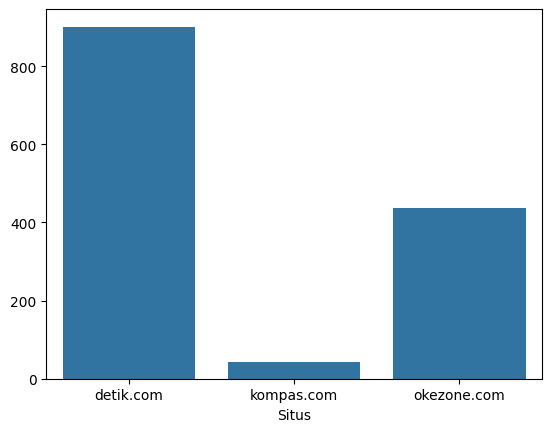

In [28]:
data['Situs'] = data['URL'].apply(lambda x: x.split('/')[2] if len(x.split('/')) == 2 else '.'.join(x.split('/')[2].split('.')[1:]))
result = data.groupby(['Situs']).size()
sns.barplot(x = result.index, y = result.values)

In [29]:
data['Konten'] = data['Konten'].str.replace("[^\w\s]", ' ', case=False)

# Mengimpor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize

# Mengimpor RegexpTokenizer dari nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Membuat instance RegexpTokenizer untuk hanya mempertahankan kata (alphanumeric)
regexp = RegexpTokenizer('\w+')

# Menerapkan tokenisasi pada kolom 'content'
data['Konten_token'] = data['Konten'].apply(regexp.tokenize)

In [30]:
data.head(5)

,Judul,Waktu,URL,Kelas,Konten,Situs,Konten_token
0,BawaBawa Marc Marquez Raul Fernandez Soroti Pe...,Senin 24 Juni 2024 18:10 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,madrid â pembalap trackhouse racing raul fer...,okezone.com,"[madrid, â, pembalap, trackhouse, racing, raul..."
1,Sebelum Putuskan Bela KTM Maverick Vinales Nya...,Senin 24 Juni 2024 17:57 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,pembalap tim aprilia racing maverick vinales t...,okezone.com,"[pembalap, tim, aprilia, racing, maverick, vin..."
2,Tak Mau Putranya Ikut Jadi Petinju Anthony Jos...,Senin 24 Juni 2024 19:30 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,tahu betapa kerasnya dunia tinju petinju asal ...,okezone.com,"[tahu, betapa, kerasnya, dunia, tinju, petinju..."
3,PUBG MOBILE Luncurkan Update Mecha Fusion Maki...,Senin 24 Juni 2024 17:58 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,salah satu game battle royale terpopuler di du...,okezone.com,"[salah, satu, game, battle, royale, terpopuler..."
4,Kaget Lihat Banyaknya Perizinan untuk Gelar Mo...,Selasa 25 Juni 2024 00:01 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,jakarta presiden republik indonesia ri joko wi...,okezone.com,"[jakarta, presiden, republik, indonesia, ri, j..."


In [31]:
nltk.download('stopwords')
# Make a list of Indonesian stopwords
stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to /home/zaens/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
my_stopwords = ['kompas', 'detik', 'okezone']
stopwords.extend(my_stopwords)
data['Konten_token'] = data['Konten_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [33]:
data.head(5)

,Judul,Waktu,URL,Kelas,Konten,Situs,Konten_token
0,BawaBawa Marc Marquez Raul Fernandez Soroti Pe...,Senin 24 Juni 2024 18:10 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,madrid â pembalap trackhouse racing raul fer...,okezone.com,"[madrid, â, pembalap, trackhouse, racing, raul..."
1,Sebelum Putuskan Bela KTM Maverick Vinales Nya...,Senin 24 Juni 2024 17:57 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,pembalap tim aprilia racing maverick vinales t...,okezone.com,"[pembalap, tim, aprilia, racing, maverick, vin..."
2,Tak Mau Putranya Ikut Jadi Petinju Anthony Jos...,Senin 24 Juni 2024 19:30 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,tahu betapa kerasnya dunia tinju petinju asal ...,okezone.com,"[betapa, kerasnya, dunia, tinju, petinju, ingg..."
3,PUBG MOBILE Luncurkan Update Mecha Fusion Maki...,Senin 24 Juni 2024 17:58 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,salah satu game battle royale terpopuler di du...,okezone.com,"[salah, game, battle, royale, terpopuler, duni..."
4,Kaget Lihat Banyaknya Perizinan untuk Gelar Mo...,Selasa 25 Juni 2024 00:01 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,jakarta presiden republik indonesia ri joko wi...,okezone.com,"[jakarta, presiden, republik, indonesia, ri, j..."


In [34]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['Konten_token']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['Konten_stemm'] = data['Konten_token'].swifter.apply(get_stemmed_term)

27728
------------------------
madrid : madrid
â : 
pembalap : balap
trackhouse : trackhouse
racing : racing
raul : raul
fernandez : fernandez
membahas : bahas
tim : tim
satelit : satelit
bersaing : saing
motogp : motogp
2024 : 2024
membawabawa : membawabawa
nama : nama
marc : marc
marquez : marquez
performa : performa
terjatuh : jatuh
qatar : qatar
portugal : portugal
balapan : balap
sukses : sukses
poin : poin
spanyol : spanyol
menempati : tempat
posisi : posisi
ke12 : ke12
klasemen : klasemen
32 : 32
peluang : peluang
mencontohkan : contoh
tampil : tampil
kompetitif : kompetitif
mengendarai : kendara
motor : motor
ducati : ducati
desmosedici : desmosedici
gp23 : gp23
gp24 : gp24
dianggap : anggap
the : the
baby : baby
alien : alien
julukan : juluk
francesco : francesco
bagnaia : bagnaia
memperebutkan : rebut
gelar : gelar
orang : orang
23 : 23
buruk : buruk
24 : 24
bertarung : tarung
dikutip : kutip
motosan : motosan
senin : senin
2462024 : 2462024
teknisi : teknisi
memiliki : milik

Pandas Apply: 100%|██████████| 1380/1380 [00:00<00:00, 36287.68it/s]


In [35]:
data.head(5)

,Judul,Waktu,URL,Kelas,Konten,Situs,Konten_token,Konten_stemm
0,BawaBawa Marc Marquez Raul Fernandez Soroti Pe...,Senin 24 Juni 2024 18:10 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,madrid â pembalap trackhouse racing raul fer...,okezone.com,"[madrid, â, pembalap, trackhouse, racing, raul...","[madrid, , balap, trackhouse, racing, raul, fe..."
1,Sebelum Putuskan Bela KTM Maverick Vinales Nya...,Senin 24 Juni 2024 17:57 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,pembalap tim aprilia racing maverick vinales t...,okezone.com,"[pembalap, tim, aprilia, racing, maverick, vin...","[balap, tim, aprilia, racing, maverick, vinale..."
2,Tak Mau Putranya Ikut Jadi Petinju Anthony Jos...,Senin 24 Juni 2024 19:30 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,tahu betapa kerasnya dunia tinju petinju asal ...,okezone.com,"[betapa, kerasnya, dunia, tinju, petinju, ingg...","[betapa, keras, dunia, tinju, tinju, inggris, ..."
3,PUBG MOBILE Luncurkan Update Mecha Fusion Maki...,Senin 24 Juni 2024 17:58 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,salah satu game battle royale terpopuler di du...,okezone.com,"[salah, game, battle, royale, terpopuler, duni...","[salah, game, battle, royale, populer, dunia, ..."
4,Kaget Lihat Banyaknya Perizinan untuk Gelar Mo...,Selasa 25 Juni 2024 00:01 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,jakarta presiden republik indonesia ri joko wi...,okezone.com,"[jakarta, presiden, republik, indonesia, ri, j...","[jakarta, presiden, republik, indonesia, ri, j..."


In [38]:
data['Konten'] = data['Konten_stemm']

In [48]:
clean_data = data[['Judul', 'Waktu', 'URL', 'Kelas', 'Konten']]

In [49]:
clean_data['Konten'] = clean_data['Konten'].apply(lambda x: ' '.join(map(str, x)))

/tmp/ipykernel_11588/3631934812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Konten'] = clean_data['Konten'].apply(lambda x: ' '.join(map(str, x)))


In [50]:
clean_data.head(5)

,Judul,Waktu,URL,Kelas,Konten
0,BawaBawa Marc Marquez Raul Fernandez Soroti Pe...,Senin 24 Juni 2024 18:10 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,madrid balap trackhouse racing raul fernandez...
1,Sebelum Putuskan Bela KTM Maverick Vinales Nya...,Senin 24 Juni 2024 17:57 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,balap tim aprilia racing maverick vinales niat...
2,Tak Mau Putranya Ikut Jadi Petinju Anthony Jos...,Senin 24 Juni 2024 19:30 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,betapa keras dunia tinju tinju inggris anthony...
3,PUBG MOBILE Luncurkan Update Mecha Fusion Maki...,Senin 24 Juni 2024 17:58 WIB,https://sports.okezone.com/read/2024/06/24/43/...,olahraga,salah game battle royale populer dunia pubg mo...
4,Kaget Lihat Banyaknya Perizinan untuk Gelar Mo...,Selasa 25 Juni 2024 00:01 WIB,https://sports.okezone.com/read/2024/06/24/38/...,olahraga,jakarta presiden republik indonesia ri joko wi...


In [51]:
clean_data.to_csv('clean_news.csv', index=False)